<a href="https://colab.research.google.com/github/rjhanjee/my-first-repo/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
url = "https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv"
kirb21_df = pd.read_csv(url)

kirby906a_ax_df = kirb21_df[kirb21_df['rawid'] == 'kirby906a_ax.img']
# kirby906a_ax_df = kirby906a_ax_df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std','icv','tbv','id'], axis = 1)
kirby906a_ax_df = kirby906a_ax_df.loc[(kirby906a_ax_df['type'] == 1) & (kirby906a_ax_df['level'] == 1)].copy()
kirby906a_ax_df.head()

telencephalon_L_volume = kirby906a_ax_df['volume'][kirby906a_ax_df['roi'] == 'Telencephalon_L'].item()
# adding .item() at the end converts this into a number
print("telencephalon_L_volume is ",telencephalon_L_volume)

telencephalon_R_volume = kirby906a_ax_df['volume'][kirby906a_ax_df['roi'] == 'Telencephalon_R'].item()
print("telencephalon_R_volume is ",telencephalon_R_volume)
Total_telencephalon_volume=telencephalon_R_volume + telencephalon_L_volume
print("Total_telencephalon_volume is ",Total_telencephalon_volume)

tbv = kirby906a_ax_df['tbv'][kirby906a_ax_df['roi'] == 'Telencephalon_R'].item()
print("tbv is ",tbv)
icv = kirby906a_ax_df['icv'][kirby906a_ax_df['roi'] == 'Telencephalon_R'].item()
print("icv is ",icv)
icv_fraction = icv/Total_telencephalon_volume
print("icv_fraction is ",icv_fraction)
tbv_fraction = tbv/Total_telencephalon_volume
print("tbv_fraction is ",tbv_fraction)



telencephalon_L_volume is  467063
telencephalon_R_volume is  470488
Total_telencephalon_volume is  937551
tbv is  1123076
icv is  1195015
icv_fraction is  1.2746133277016396
tbv_fraction is  1.1978825685216057


In [20]:
import pandas as pd
url = "https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv"
kirb21_df = pd.read_csv(url)

kirby906a_ax_df = kirb21_df[kirb21_df['rawid'] == 'kirby906a_ax.img']
kirby906a_ax_df = kirby906a_ax_df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std','icv','tbv','id','roi'], axis = 1)
# kirby906a_ax_df = kirby906a_ax_df.loc[(kirby906a_ax_df['type'] == 1) & (kirby906a_ax_df['level'] == 1)].copy()
kirby906a_ax_df.head()
all_regions_df = kirby906a_ax_df.groupby(['type', 'level']).sum().reset_index()

print(all_regions_df)

   type  level   volume
0     1      1  1195015
1     1      2  1195021
2     1      3  1195034
3     1      4  1195065
4     1      5  1195124
5     2      1  1195015
6     2      2  1195022
7     2      3  1195032
8     2      4  1195041
9     2      5  1195092


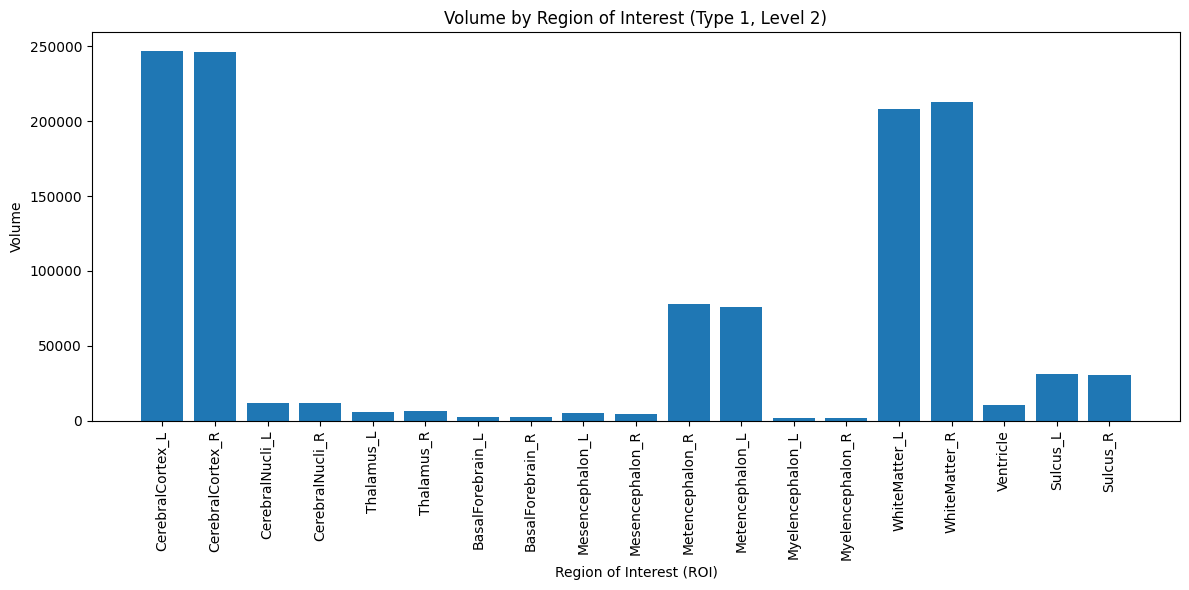

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot
url = "https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv"
kirb21_df = pd.read_csv(url)

kirby906a_ax_df = kirb21_df[kirb21_df['rawid'] == 'kirby906a_ax.img']
kirby906a_ax_df = kirby906a_ax_df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std','icv','tbv','id'], axis = 1)

kirby906a_ax_df = kirby906a_ax_df.loc[(kirby906a_ax_df['type'] == 1) & (kirby906a_ax_df['level'] == 2)].copy()


# Use matplotlib to create the bar plot
plt.figure(figsize=(12, 6)) # Optional: Adjust figure size
plt.bar(x=kirby906a_ax_df['roi'], height=kirby906a_ax_df['volume'])
plt.xticks(rotation=90) # Optional: Rotate x-axis labels for better readability
plt.xlabel('Region of Interest (ROI)')
plt.ylabel('Volume')
plt.title('Volume by Region of Interest (Type 1, Level 2)')
plt.tight_layout() # Optional: Adjust layout to prevent labels overlapping
plt.show()

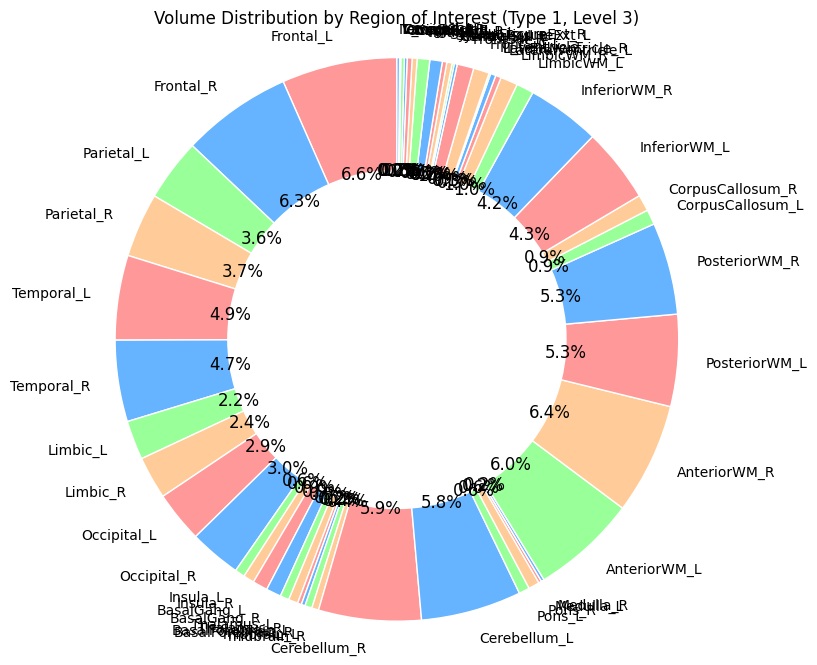

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot
url = "https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv"
kirb21_df = pd.read_csv(url)

kirby906a_ax_df = kirb21_df[kirb21_df['rawid'] == 'kirby906a_ax.img']
kirby906a_ax_df = kirby906a_ax_df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std','icv','tbv','id'], axis = 1)

kirby906a_ax_df = kirby906a_ax_df.loc[(kirby906a_ax_df['type'] == 1) & (kirby906a_ax_df['level'] == 3)].copy()
# kirby906a_ax_df.head()

# Define sizes and labels for the pie chart
sizes = kirby906a_ax_df['volume']
labels = kirby906a_ax_df['roi']

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'] # Optional: define colors

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                  startangle=90, colors=colors,
                                  wedgeprops=dict(width=0.4, edgecolor='white')) # width creates the donut hole

# Add a circle in the center to make it a donut
# You can also use plt.Circle directly if you don't use wedgeprops width
# centre_circle = plt.Circle((0,0), 0.60, fc='white')
# fig.gca().add_artist(centre_circle)

# Customize the text properties (optional)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)

# Set the aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')

# Add a title
ax.set_title('Volume Distribution by Region of Interest (Type 1, Level 3)')

# Display the chart
plt.show()

In [5]:
import requests
import csv
from io import StringIO

url = 'https://raw.githubusercontent.com/bcaffo/ds4bme/master/data/classInterests.txt'

try:
    # Make an HTTP GET request to the URL
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes

    # Read the content into a file-like object
    data = StringIO(response.text)

    # Use the csv module to parse the data
    reader = csv.reader(data, delimiter='\t')  # The data is tab-separated

    # Store the data in a list of lists
    class_data = [row for row in reader]

    # Print the data (optional)
    for row in class_data:
        print(row)

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from the URL: {e}")



['Year', 'Program']
["Master's", 'BME']
["Master's", 'BME']
['Senior', 'BME']
['PhD', 'BME']
['PhD', 'Computer_Science']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
['Junior', 'BME']
["Master's", 'BME']
["Master's", 'Materials_Science']
["Master's", 'BME']
["Master's", 'BME']
['Senior', 'ChemBE']
["Master's", 'BME']
['Sophomore', 'BME']
['Junior', 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
['Sophomore', 'BME']
["Master's", 'ChemBE']
["Master's", 'JHSPH-MMI']
['PhD', 'BCMB_SOM']
["Master's", 'BME']
["Master's", 'BME']
['Junior', 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
["Master's", 'BME']
